In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/multi-model-for-mosquito-my-fyp/VisText-Mosquito A Multimodal Dataset for Mosquito/image_discription.csv
/kaggle/input/multi-model-for-mosquito-my-fyp/VisText-Mosquito A Multimodal Dataset for Mosquito/Breeding Place Detection/README.dataset.txt
/kaggle/input/multi-model-for-mosquito-my-fyp/VisText-Mosquito A Multimodal Dataset for Mosquito/Breeding Place Detection/README.roboflow.txt
/kaggle/input/multi-model-for-mosquito-my-fyp/VisText-Mosquito A Multimodal Dataset for Mosquito/Breeding Place Detection/data.yaml
/kaggle/input/multi-model-for-mosquito-my-fyp/VisText-Mosquito A Multimodal Dataset for Mosquito/Breeding Place Detection/valid/labels/20240916_114409_jpg.rf.2c3caa3fdbe418abc6835921a0ec5451.txt
/kaggle/input/multi-model-for-mosquito-my-fyp/VisText-Mosquito A Multimodal Dataset for Mosquito/Breeding Place Detection/valid/labels/1726484414485_jpg.rf.b6223aaa2fe11b90c9f50fd9204dff37.txt
/kaggle/input/multi-model-for-mosquito-my-fyp/VisText-Mosquito A Multimodal Da

In [2]:
!pip install -q --upgrade ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.2 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.5 MB/s eta 0:00:00:00:0100:01


In [3]:
from ultralytics import YOLO
import zipfile
from IPython.display import FileLink
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
# Define the correct data.yaml content
data_yaml = """
train: /kaggle/input/multi-model-for-mosquito-my-fyp/VisText-Mosquito A Multimodal Dataset for Mosquito/Water Surface Segmentation/train/images
val: /kaggle/input/multi-model-for-mosquito-my-fyp/VisText-Mosquito A Multimodal Dataset for Mosquito/Water Surface Segmentation/valid/images
test: /kaggle/input/multi-model-for-mosquito-my-fyp/VisText-Mosquito A Multimodal Dataset for Mosquito/Water Surface Segmentation/test/images

nc: 2
names: ['tire_with_water', 'vase_with_water']

roboflow:
  workspace: bappy-workspace
  project: breeding-place-u5p3c
  version: 5
  license: CC BY 4.0
  url: https://universe.roboflow.com/bappy-workspace/breeding-place-u5p3c/dataset/5
"""

# Save to data.yaml
os.makedirs("/kaggle/working", exist_ok=True)
with open("/kaggle/working/data.yaml", "w") as f:
    f.write(data_yaml)

print("✅ data.yaml created at /kaggle/working/data.yaml")

✅ data.yaml created at /kaggle/working/data.yaml


In [5]:
# Cell 4
# Load YOLOv11 segmentation model (changed yolov8x-seg.pt → yolov11n-seg.pt)
model = YOLO("yolo11n-seg.pt")

# Train the model
results = model.train(
    data="/kaggle/working/data.yaml",
    imgsz=640,
    epochs=100,
    batch=8,
    name="segmentation_model",
    project="/kaggle/working"
)

Ultralytics 8.3.183 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=segmentation_model, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.5±0.2 ms, read: 29.6±6.7 MB/s, size: 91.5 KB)


train: Scanning /kaggle/input/multi-model-for-mosquito-my-fyp/VisText-Mosquito A Multimodal Dataset for Mosquito/Water Surface Segmentation/train/labels... 286 images, 3 backgrounds, 0 corrupt: 100%|██████████| 286/286 [00:00<00:00, 370.26it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/multi-model-for-mosquito-my-fyp/VisText-Mosquito A Multimodal Dataset for Mosquito/Water Surface Segmentation/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 28.0±6.0 MB/s, size: 82.6 KB)


val: Scanning /kaggle/input/multi-model-for-mosquito-my-fyp/VisText-Mosquito A Multimodal Dataset for Mosquito/Water Surface Segmentation/valid/labels... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<00:00, 333.78it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/multi-model-for-mosquito-my-fyp/VisText-Mosquito A Multimodal Dataset for Mosquito/Water Surface Segmentation/valid is not writeable, cache not saved.


Plotting labels to /kaggle/working/segmentation_model/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /kaggle/working/segmentation_model
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.49G      1.533      3.409      3.668      1.507         14        640: 100%|██████████| 36/36 [00:07<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]

                   all         30         43    0.00347      0.737      0.143     0.0615    0.00292      0.621     0.0951     0.0374



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.24G      1.465      2.787      2.996      1.356         20        640: 100%|██████████| 36/36 [00:05<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.32it/s]

                   all         30         43      0.219      0.103       0.11     0.0606      0.243      0.103      0.134     0.0767



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.25G      1.433      2.585      2.674       1.36         25        640: 100%|██████████| 36/36 [00:05<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.54it/s]

                   all         30         43      0.252      0.334      0.225      0.126       0.12     0.0956     0.0266    0.00697



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.27G      1.426      2.489      2.502      1.374         20        640: 100%|██████████| 36/36 [00:05<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.89it/s]

                   all         30         43       0.36      0.291      0.237      0.116      0.448      0.359      0.305      0.115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.29G      1.357      2.281      2.304       1.29         12        640: 100%|██████████| 36/36 [00:05<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.53it/s]

                   all         30         43      0.429      0.251      0.261     0.0988      0.429      0.251      0.254      0.121



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100       2.3G        1.3      2.169      2.037      1.231         15        640: 100%|██████████| 36/36 [00:05<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.45it/s]

                   all         30         43      0.249      0.387      0.238      0.115       0.26      0.407      0.236      0.115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.32G      1.215      2.047      1.981       1.22         14        640: 100%|██████████| 36/36 [00:05<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.49it/s]

                   all         30         43      0.236      0.371      0.273      0.154      0.236      0.371      0.268      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.34G      1.217      2.013      1.796      1.208         23        640: 100%|██████████| 36/36 [00:05<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.58it/s]

                   all         30         43      0.656      0.388      0.444      0.238      0.678      0.405      0.425      0.206



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.35G      1.223      2.034      1.762      1.188         17        640: 100%|██████████| 36/36 [00:05<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all         30         43      0.523      0.462      0.434      0.253       0.56       0.47      0.427      0.252



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.37G      1.117      2.025      1.611      1.147         15        640: 100%|██████████| 36/36 [00:05<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.14it/s]

                   all         30         43       0.36      0.418      0.365      0.221      0.368      0.452      0.368      0.206



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.38G      1.134      1.939       1.56      1.162         12        640: 100%|██████████| 36/36 [00:05<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]

                   all         30         43      0.427      0.534      0.452      0.255      0.516      0.521      0.461      0.248



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100       2.4G      1.152      1.824      1.503      1.153         16        640: 100%|██████████| 36/36 [00:05<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.20it/s]

                   all         30         43      0.764       0.61      0.683      0.464      0.764       0.61      0.682      0.378



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.42G      1.113       1.82      1.455      1.131         15        640: 100%|██████████| 36/36 [00:05<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.89it/s]

                   all         30         43      0.713       0.47      0.541      0.346      0.745       0.49      0.546        0.3



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.44G      1.057      1.756      1.383      1.101         19        640: 100%|██████████| 36/36 [00:05<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.17it/s]

                   all         30         43      0.849      0.626      0.676      0.436      0.799      0.586      0.618      0.354



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.45G      1.057       1.67      1.404      1.111         25        640: 100%|██████████| 36/36 [00:05<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.98it/s]

                   all         30         43      0.782      0.506      0.587      0.393      0.857      0.553      0.628      0.383



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.47G     0.9941      1.629      1.261      1.071         16        640: 100%|██████████| 36/36 [00:05<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.42it/s]

                   all         30         43      0.767      0.592      0.657      0.428      0.767      0.592      0.655      0.431



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.48G      1.021      1.655      1.222      1.061         16        640: 100%|██████████| 36/36 [00:05<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.19it/s]

                   all         30         43        0.6      0.612      0.551      0.397      0.662      0.666       0.59      0.387



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100       2.5G     0.9963      1.693      1.187      1.097         17        640: 100%|██████████| 36/36 [00:05<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]

                   all         30         43       0.69      0.482       0.54      0.385      0.613      0.653      0.606      0.375



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.52G     0.9932      1.638      1.149      1.061         12        640: 100%|██████████| 36/36 [00:05<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.15it/s]

                   all         30         43       0.84       0.53      0.634      0.446      0.833      0.586      0.671      0.415



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.53G     0.8768       1.53       1.09      1.028         15        640: 100%|██████████| 36/36 [00:05<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]

                   all         30         43      0.704      0.535      0.597      0.435      0.785       0.59       0.65      0.407



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.55G     0.9416      1.613      1.125      1.043         19        640: 100%|██████████| 36/36 [00:05<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.82it/s]

                   all         30         43      0.657      0.592      0.594      0.405      0.859      0.526      0.616      0.389



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.56G     0.9132      1.545      1.084      1.035         23        640: 100%|██████████| 36/36 [00:05<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         30         43       0.61      0.517      0.576        0.4      0.669      0.566      0.611      0.353



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.58G     0.9365      1.584       1.05      1.033         17        640: 100%|██████████| 36/36 [00:05<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         30         43      0.881      0.575      0.709      0.451      0.859      0.567      0.705      0.424



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100       2.6G      0.895      1.457      1.043      1.032         12        640: 100%|██████████| 36/36 [00:05<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         30         43      0.865      0.593      0.653      0.435      0.793      0.661      0.662      0.398



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.61G     0.8891      1.492     0.9987      1.021         19        640: 100%|██████████| 36/36 [00:05<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.36it/s]

                   all         30         43      0.887       0.53      0.629      0.431      0.887       0.53      0.634      0.401



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.63G     0.9444      1.533       1.03      1.033         15        640: 100%|██████████| 36/36 [00:05<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         30         43      0.853      0.462      0.528      0.362      0.821      0.472      0.545      0.356



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.64G     0.8865      1.376     0.9587      1.027         19        640: 100%|██████████| 36/36 [00:05<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]

                   all         30         43      0.851      0.591      0.643      0.429      0.851      0.591      0.644      0.423



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.66G      0.822      1.346     0.9246     0.9953         27        640: 100%|██████████| 36/36 [00:05<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]

                   all         30         43      0.705      0.644       0.67      0.489      0.729      0.664      0.677      0.464



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.68G     0.8227      1.444     0.9389     0.9938         19        640: 100%|██████████| 36/36 [00:05<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         30         43      0.723      0.633      0.661       0.44      0.747      0.651      0.683      0.427



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.69G     0.8003      1.395     0.8883     0.9822         30        640: 100%|██████████| 36/36 [00:05<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         30         43      0.878      0.541      0.653      0.429      0.878      0.541       0.67       0.41



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.71G     0.8059      1.358     0.8537     0.9902          8        640: 100%|██████████| 36/36 [00:05<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.89it/s]

                   all         30         43      0.736      0.646      0.727      0.472      0.755      0.646      0.731      0.433



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.73G     0.7962      1.317     0.8631     0.9749         14        640: 100%|██████████| 36/36 [00:05<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]

                   all         30         43      0.724      0.646      0.699      0.472      0.871      0.593      0.736      0.451



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.74G      0.835      1.387     0.8778       1.01         20        640: 100%|██████████| 36/36 [00:05<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         30         43      0.853      0.569      0.698      0.471      0.853      0.569      0.724      0.441



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.76G     0.8336      1.375     0.8594     0.9826         18        640: 100%|██████████| 36/36 [00:05<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         30         43      0.676       0.62      0.646      0.452      0.692      0.652      0.651      0.403



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.78G     0.8159      1.303     0.8309     0.9941         12        640: 100%|██████████| 36/36 [00:05<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]

                   all         30         43      0.825      0.661      0.711      0.493      0.844      0.661      0.724      0.452



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.79G     0.7889      1.255     0.8023     0.9867         18        640: 100%|██████████| 36/36 [00:05<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]

                   all         30         43      0.719      0.707      0.744      0.545      0.736      0.727       0.76      0.507



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.81G     0.8221      1.398      0.855     0.9981         24        640: 100%|██████████| 36/36 [00:05<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         30         43      0.805      0.655      0.737      0.474      0.805      0.655      0.739      0.478



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.82G     0.8153      1.364      0.807      1.001         12        640: 100%|██████████| 36/36 [00:05<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.99it/s]

                   all         30         43      0.791      0.674        0.7      0.505      0.848      0.719      0.743      0.468



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.84G     0.7536      1.303     0.7844     0.9649         19        640: 100%|██████████| 36/36 [00:05<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         30         43      0.765      0.671      0.712      0.469      0.824      0.709      0.727      0.454



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.86G     0.7359      1.195     0.7336     0.9507         25        640: 100%|██████████| 36/36 [00:05<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.92it/s]

                   all         30         43      0.901      0.606        0.7      0.474      0.901      0.606      0.706      0.437



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.87G     0.7346      1.237     0.7243     0.9612         23        640: 100%|██████████| 36/36 [00:05<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.15it/s]

                   all         30         43      0.894      0.614      0.696      0.476      0.894      0.614      0.703      0.433



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.89G     0.7775      1.289     0.7372     0.9695         17        640: 100%|██████████| 36/36 [00:05<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]

                   all         30         43      0.842      0.514      0.579      0.438      0.864      0.534      0.648      0.394



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.91G     0.7054      1.214     0.7136     0.9567          6        640: 100%|██████████| 36/36 [00:05<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.92it/s]

                   all         30         43      0.879       0.57      0.658      0.454      0.903       0.59       0.72       0.45



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.92G     0.7176      1.207     0.7003     0.9548         17        640: 100%|██████████| 36/36 [00:05<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all         30         43      0.898      0.567       0.63      0.457      0.923      0.587       0.67      0.431



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.94G     0.7472      1.254     0.6984     0.9631         16        640: 100%|██████████| 36/36 [00:05<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.29it/s]

                   all         30         43      0.712      0.629      0.677      0.491      0.766      0.682      0.707      0.452



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.95G     0.7017      1.194     0.7154     0.9516         21        640: 100%|██████████| 36/36 [00:05<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         30         43      0.902      0.598      0.685      0.485      0.862      0.673      0.718      0.463



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.97G     0.6553      1.063     0.6363     0.9231         21        640: 100%|██████████| 36/36 [00:05<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         30         43       0.76      0.619      0.661      0.461      0.812      0.674      0.706      0.442



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.99G     0.7206      1.237     0.6996     0.9538         13        640: 100%|██████████| 36/36 [00:05<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         30         43      0.753      0.606      0.677      0.493      0.773      0.626      0.685      0.464



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100         3G     0.7016      1.191     0.6794     0.9361         27        640: 100%|██████████| 36/36 [00:05<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         30         43      0.836      0.616      0.672      0.501      0.857      0.635      0.696      0.463



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.02G     0.6971      1.152     0.6792     0.9534         11        640: 100%|██████████| 36/36 [00:05<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]

                   all         30         43      0.852      0.565      0.673      0.489      0.874      0.585      0.685      0.453



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.04G      0.705      1.185     0.6536     0.9416         11        640: 100%|██████████| 36/36 [00:05<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.97it/s]

                   all         30         43      0.774      0.695      0.729      0.524      0.774      0.695      0.734      0.487



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.05G     0.6902      1.138     0.6548     0.9324         32        640: 100%|██████████| 36/36 [00:05<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         30         43      0.824      0.709      0.769      0.554      0.848      0.729      0.783      0.508



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.07G     0.6354      1.133     0.6017     0.9321         14        640: 100%|██████████| 36/36 [00:05<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         30         43      0.881      0.663      0.735      0.503      0.881      0.663      0.735      0.459



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.08G     0.6774      1.112     0.6382     0.9484         12        640: 100%|██████████| 36/36 [00:05<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         30         43      0.776      0.749      0.747       0.49      0.794      0.769       0.77      0.469



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100       3.1G     0.6667      1.142     0.6493     0.9282         10        640: 100%|██████████| 36/36 [00:05<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.04it/s]

                   all         30         43      0.794       0.59      0.686      0.457      0.838       0.59      0.737      0.443



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.12G     0.6584      1.148     0.6243     0.9369         17        640: 100%|██████████| 36/36 [00:05<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         30         43      0.846      0.618      0.718      0.519      0.747      0.701      0.717      0.484



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.13G     0.6775      1.109     0.6059     0.9438         20        640: 100%|██████████| 36/36 [00:05<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         30         43      0.883      0.641      0.739      0.531      0.883      0.641      0.727      0.488



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.15G      0.657      1.064     0.6017     0.9265         10        640: 100%|██████████| 36/36 [00:05<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]

                   all         30         43       0.83      0.701      0.745      0.525      0.852      0.667      0.739      0.476



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.16G     0.6573      1.118       0.62     0.9267         25        640: 100%|██████████| 36/36 [00:05<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.93it/s]

                   all         30         43      0.895      0.643      0.755      0.545      0.897      0.693      0.794      0.491



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.18G     0.6607      1.081     0.5954     0.9246         19        640: 100%|██████████| 36/36 [00:05<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]

                   all         30         43      0.842      0.653      0.699      0.502      0.842      0.653      0.721      0.458



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100       3.2G     0.6372       1.09     0.6039     0.9374         14        640: 100%|██████████| 36/36 [00:05<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.27it/s]

                   all         30         43      0.858       0.57      0.654      0.465      0.892      0.633      0.739      0.441



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.22G     0.6336      1.066     0.5908     0.9337         17        640: 100%|██████████| 36/36 [00:05<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         30         43      0.815      0.661      0.708       0.49      0.872       0.64      0.721      0.455



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.23G     0.6179      1.024     0.5565     0.9298         14        640: 100%|██████████| 36/36 [00:05<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]

                   all         30         43      0.813      0.685      0.733       0.52      0.813      0.685      0.733      0.467



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.25G     0.6154      1.031     0.5655      0.922         29        640: 100%|██████████| 36/36 [00:05<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]

                   all         30         43      0.896       0.57      0.705      0.473      0.896       0.57      0.721       0.45



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.26G     0.5978      1.065     0.5383     0.9031         22        640: 100%|██████████| 36/36 [00:05<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         30         43      0.894       0.55      0.694       0.49      0.915       0.57      0.723      0.464



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.28G     0.6416      1.087     0.5663     0.9238         14        640: 100%|██████████| 36/36 [00:05<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.17it/s]

                   all         30         43      0.879       0.59      0.702      0.509      0.819      0.684      0.758      0.476



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.29G     0.6022      1.041     0.5511      0.907         19        640: 100%|██████████| 36/36 [00:05<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         30         43      0.862      0.578       0.67      0.498      0.862      0.578      0.677      0.451



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.31G     0.5955     0.9973     0.5479     0.8968         11        640: 100%|██████████| 36/36 [00:05<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.27it/s]

                   all         30         43      0.645      0.723      0.675      0.463      0.671      0.762      0.741      0.452



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.33G     0.6087      1.019     0.5436      0.909         14        640: 100%|██████████| 36/36 [00:05<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         30         43      0.737      0.626      0.667      0.465       0.76      0.668      0.702      0.452



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.35G     0.5815       1.02     0.5279     0.9057         16        640: 100%|██████████| 36/36 [00:05<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]

                   all         30         43      0.898      0.596      0.662      0.472      0.948      0.636      0.728      0.457



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.36G     0.5824      1.008     0.5453      0.903         15        640: 100%|██████████| 36/36 [00:05<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         30         43      0.895      0.565      0.695      0.482      0.791      0.673      0.722      0.462



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.38G     0.5371       1.06     0.5103     0.8888         18        640: 100%|██████████| 36/36 [00:05<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         30         43      0.889      0.709      0.748      0.524      0.889      0.709      0.762      0.491



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.39G     0.5567     0.9641      0.512      0.891         24        640: 100%|██████████| 36/36 [00:05<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.06it/s]

                   all         30         43      0.747      0.729      0.729      0.518      0.747      0.729      0.735      0.484



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.41G      0.539     0.9766     0.5374      0.889         18        640: 100%|██████████| 36/36 [00:05<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.22it/s]

                   all         30         43      0.842      0.623      0.709      0.519      0.822      0.633      0.732      0.502



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.43G     0.5592     0.9603     0.5056     0.8981         11        640: 100%|██████████| 36/36 [00:05<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.02it/s]

                   all         30         43      0.921      0.592      0.708      0.525      0.814      0.681      0.725      0.495



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.44G     0.5527     0.8806     0.5052      0.901         17        640: 100%|██████████| 36/36 [00:05<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]

                   all         30         43      0.845      0.653      0.724      0.539      0.865      0.757      0.793      0.499



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.46G     0.5586     0.9612     0.5084     0.9025         18        640: 100%|██████████| 36/36 [00:05<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]

                   all         30         43        0.9      0.618      0.715      0.513      0.931      0.635      0.771      0.488



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.47G     0.5644     0.9573     0.5061     0.9011         18        640: 100%|██████████| 36/36 [00:05<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         30         43      0.857      0.598      0.699      0.498      0.881      0.618      0.751      0.463



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.49G     0.5403     0.9288     0.4743     0.8864          8        640: 100%|██████████| 36/36 [00:05<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         30         43      0.841      0.575      0.718      0.528      0.795      0.638       0.77      0.491



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.51G     0.5207     0.9326     0.4659     0.8828         22        640: 100%|██████████| 36/36 [00:05<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.06it/s]

                   all         30         43      0.697      0.709      0.733      0.539      0.825      0.701      0.788      0.499



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.52G     0.5088     0.9372     0.4808       0.88         18        640: 100%|██████████| 36/36 [00:05<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]

                   all         30         43      0.735      0.681      0.714      0.531      0.795      0.696      0.771        0.5



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.54G     0.5369     0.9473     0.4776     0.8843         15        640: 100%|██████████| 36/36 [00:05<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.05it/s]

                   all         30         43      0.773      0.669      0.723      0.527      0.812      0.708       0.78      0.493



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.55G     0.5197     0.9388     0.4632      0.881         35        640: 100%|██████████| 36/36 [00:05<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]

                   all         30         43       0.79      0.681      0.732       0.52      0.899      0.644      0.754      0.488



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.57G     0.5233     0.8702      0.461     0.8835         15        640: 100%|██████████| 36/36 [00:05<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.25it/s]

                   all         30         43      0.784      0.696      0.763      0.531      0.804      0.716      0.783      0.502



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.59G      0.525     0.9343     0.4521     0.8747         12        640: 100%|██████████| 36/36 [00:05<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         30         43      0.923      0.578      0.723      0.534      0.899      0.653      0.761      0.499



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.61G     0.5125     0.8892     0.4486     0.8717         17        640: 100%|██████████| 36/36 [00:05<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         30         43      0.922      0.578      0.708      0.518      0.956      0.658      0.786      0.505



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.62G     0.4777     0.8664     0.4204      0.874         26        640: 100%|██████████| 36/36 [00:05<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         30         43      0.919      0.596      0.713      0.538      0.935      0.638      0.788      0.499



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.64G     0.4914     0.8733     0.4366      0.877         16        640: 100%|██████████| 36/36 [00:05<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.22it/s]

                   all         30         43      0.928      0.598      0.712      0.555      0.928      0.598      0.748      0.503



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.65G      0.495     0.8605     0.4416      0.884         10        640: 100%|██████████| 36/36 [00:05<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.48it/s]

                   all         30         43       0.93      0.598      0.726      0.533      0.848      0.673      0.758      0.499



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.67G     0.5094     0.8705     0.4309     0.8851         13        640: 100%|██████████| 36/36 [00:05<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.25it/s]

                   all         30         43      0.934      0.597      0.734      0.538      0.882      0.695      0.797      0.502


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.69G     0.4229     0.8451     0.4112     0.8612         15        640: 100%|██████████| 36/36 [00:05<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         30         43      0.886      0.649      0.753      0.547      0.861      0.729      0.804      0.509



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.71G     0.4153     0.7718     0.3737      0.837         10        640: 100%|██████████| 36/36 [00:05<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.15it/s]

                   all         30         43      0.714      0.734      0.749      0.555      0.814      0.729      0.798      0.516



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.72G     0.4167      0.793     0.3792     0.8463          8        640: 100%|██████████| 36/36 [00:04<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         30         43      0.917      0.596      0.748      0.556      0.764      0.749      0.806      0.506



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.74G     0.4116     0.7887     0.3773      0.843          9        640: 100%|██████████| 36/36 [00:04<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]

                   all         30         43      0.788      0.646      0.746      0.555      0.776      0.745      0.799      0.507



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.75G     0.4143     0.7638     0.3697     0.8416         15        640: 100%|██████████| 36/36 [00:04<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         30         43      0.845      0.646      0.745      0.542      0.776      0.716      0.804      0.506



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.77G     0.3977     0.7799     0.3523      0.826         11        640: 100%|██████████| 36/36 [00:04<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.40it/s]

                   all         30         43      0.859      0.664      0.746      0.545      0.822      0.797      0.822      0.512



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      3.79G     0.3907     0.7774     0.3556     0.8361          8        640: 100%|██████████| 36/36 [00:04<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.96it/s]

                   all         30         43      0.866      0.668      0.746       0.55      0.877      0.797      0.826      0.508



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100       3.8G     0.3984     0.7581     0.3559     0.8282         10        640: 100%|██████████| 36/36 [00:04<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         30         43      0.905      0.643      0.743      0.548      0.884      0.769       0.82       0.51



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.82G      0.382     0.7593     0.3573     0.8264         16        640: 100%|██████████| 36/36 [00:04<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.97it/s]

                   all         30         43      0.898      0.641      0.744      0.545      0.839      0.777      0.819      0.512



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      3.84G     0.3744     0.7194      0.344     0.8304          9        640: 100%|██████████| 36/36 [00:04<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]

                   all         30         43      0.901      0.644      0.743      0.549      0.821      0.773      0.814      0.514



100 epochs completed in 0.162 hours.
Optimizer stripped from /kaggle/working/segmentation_model/weights/last.pt, 6.0MB
Optimizer stripped from /kaggle/working/segmentation_model/weights/best.pt, 6.0MB

Validating /kaggle/working/segmentation_model/weights/best.pt...
Ultralytics 8.3.183 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-seg summary (fused): 113 layers, 2,834,958 parameters, 0 gradients, 9.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         30         43      0.715      0.734      0.749      0.551      0.817      0.729      0.798      0.512
       tire_with_water         17         18      0.739      0.788      0.806      0.629       0.82      0.778      0.815      0.586
       vase_with_water         13         25      0.691       0.68      0.692      0.473      0.814       0.68      0.781      0.438
Speed: 0.2ms preprocess, 3.8ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to /kaggle/working/segmentation_model


In [6]:
# Validate model performance
metrics = model.val()
print(metrics)  # Shows precision, recall, mAP, etc.

Ultralytics 8.3.183 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-seg summary (fused): 113 layers, 2,834,958 parameters, 0 gradients, 9.6 GFLOPs
val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 212.0±24.7 MB/s, size: 105.4 KB)


val: Scanning /kaggle/input/multi-model-for-mosquito-my-fyp/VisText-Mosquito A Multimodal Dataset for Mosquito/Water Surface Segmentation/valid/labels... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<00:00, 675.01it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/multi-model-for-mosquito-my-fyp/VisText-Mosquito A Multimodal Dataset for Mosquito/Water Surface Segmentation/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         30         43      0.714      0.733      0.749      0.553      0.814      0.729      0.798      0.515
       tire_with_water         17         18      0.739      0.787      0.805      0.632       0.82      0.778      0.815      0.593
       vase_with_water         13         25      0.689       0.68      0.692      0.474      0.809       0.68      0.781      0.437
Speed: 4.9ms preprocess, 17.7ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to /kaggle/working/segmentation_model2
ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bc300b0d290>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,   


image 1/1 /kaggle/input/multi-model-for-mosquito-my-fyp/VisText-Mosquito A Multimodal Dataset for Mosquito/Water Surface Segmentation/test/images/20240701_130555-0-_jpg.rf.76aa7ddbff5f5a12de6a859b8d09df05.jpg: 640x640 2 vase_with_waters, 10.9ms
Speed: 2.3ms preprocess, 10.9ms inference, 13.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /kaggle/working/segmentation_model3


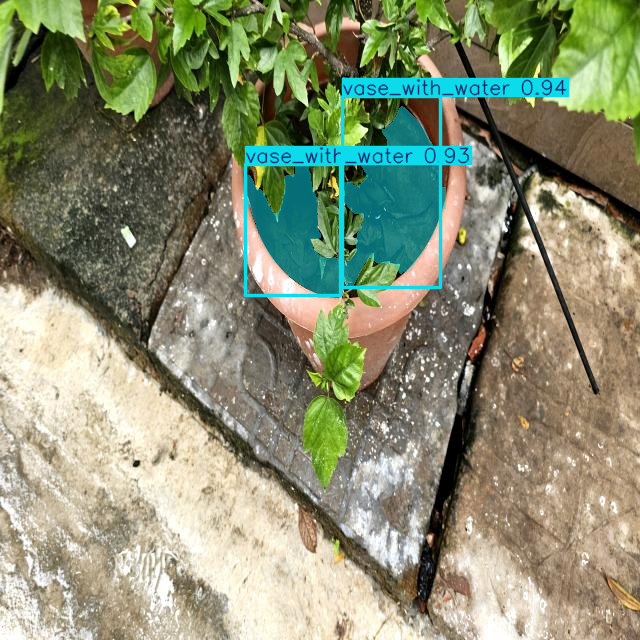

In [7]:
# Run inference on a single image
results = model.predict(
    source="/kaggle/input/multi-model-for-mosquito-my-fyp/VisText-Mosquito A Multimodal Dataset for Mosquito/Water Surface Segmentation/test/images/20240701_130555-0-_jpg.rf.76aa7ddbff5f5a12de6a859b8d09df05.jpg",  # change to your image
    save=True,        # saves result images in runs/segment/predict
    imgsz=640,
    conf=0.5
)

# Display output
results[0].show()


In [8]:
# Predict on the test dataset
results = model.predict(
    source="/kaggle/input/multi-model-for-mosquito-my-fyp/VisText-Mosquito A Multimodal Dataset for Mosquito/Water Surface Segmentation/test/images",
    save=True,
    imgsz=640,
    conf=0.5
)

print("✅ All predictions saved in:", results[0].save_dir)



image 1/15 /kaggle/input/multi-model-for-mosquito-my-fyp/VisText-Mosquito A Multimodal Dataset for Mosquito/Water Surface Segmentation/test/images/20240701_130549_jpg.rf.7923392835f5c2ac8738cae5a9ad4c4d.jpg: 640x640 1 vase_with_water, 11.8ms
image 2/15 /kaggle/input/multi-model-for-mosquito-my-fyp/VisText-Mosquito A Multimodal Dataset for Mosquito/Water Surface Segmentation/test/images/20240701_130554_jpg.rf.889003f6d37fb967089366e8f8cb9312.jpg: 640x640 4 vase_with_waters, 9.9ms
image 3/15 /kaggle/input/multi-model-for-mosquito-my-fyp/VisText-Mosquito A Multimodal Dataset for Mosquito/Water Surface Segmentation/test/images/20240701_130555-0-_jpg.rf.76aa7ddbff5f5a12de6a859b8d09df05.jpg: 640x640 2 vase_with_waters, 9.9ms
image 4/15 /kaggle/input/multi-model-for-mosquito-my-fyp/VisText-Mosquito A Multimodal Dataset for Mosquito/Water Surface Segmentation/test/images/20240701_130556_jpg.rf.efb80dcec1283866b5d4f3b4ca3c3120.jpg: 640x640 3 vase_with_waters, 10.2ms
image 5/15 /kaggle/input/mu

In [9]:
# Export the trained YOLOv11n-seg model
model.export(format="onnx")      # options: onnx, torchscript, engine, etc.

Ultralytics 8.3.183 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from '/kaggle/working/segmentation_model/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 38, 8400), (1, 32, 160, 160)) (5.7 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.59', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 11.4s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.64...
ONNX: export success ✅ 14.0s, saved as '/kaggle/working/segmentation_model/weights/best.onnx' (11.1 MB)

Export complete (14.4s)
Results saved to /kaggle/working/segmentation_model/weights
Predict:         yolo predict task=segment model=/k

'/kaggle/working/segmentation_model/weights/best.onnx'

In [10]:
import shutil

output_dir = str(results[0].save_dir)
zip_path = "/kaggle/working/predictions.zip"
shutil.make_archive(zip_path.replace(".zip", ""), 'zip', output_dir)

# Create download link
FileLink(zip_path)


/kaggle/working/predictions.zip